In [330]:
##### Data is downloaded from Kaggle  https://www.kaggle.com/team-ai/shanghai-pm25-air-pollution-historical-data#ShanghaiPM20100101_20151231_Test%20-%20Test.csv
##### City is Shanghai, China

import numpy as ny
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('D:/pyLX/PM_Test.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             401 non-null    int64  
 1   year           401 non-null    int64  
 2   month          401 non-null    int64  
 3   day            401 non-null    int64  
 4   hour           401 non-null    int64  
 5   season         401 non-null    int64  
 6   PM_Jingan      395 non-null    float64
 7   PM_US Post     376 non-null    float64
 8   PM_Xuhui       397 non-null    float64
 9   DEWP           401 non-null    int64  
 10  HUMI           401 non-null    float64
 11  PRES           401 non-null    int64  
 12  TEMP           401 non-null    int64  
 13  cbwd           401 non-null    object 
 14  Iws            401 non-null    int64  
 15  precipitation  257 non-null    float64
 16  Iprec          257 non-null    float64
dtypes: float64(6), int64(10), object(1)
memory usage: 53.4

In [331]:
## Integratae 'year','month','day'(column names) into one timestamp
df['date']=pd.PeriodIndex(year=df['year'],month=df['month'],day=df['day'],hour=df['hour'],freq='H')
df.set_index('date',inplace=True)
df

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
date,,,,,,,,,,,,,,,,,
2015-12-15 07:00,52184,2015,12,15,7,4,269.0,269.0,276.0,1,70.27,1025,6,NW,176,0.0,0.0
2015-12-15 08:00,52185,2015,12,15,8,4,261.0,251.0,271.0,0,61.01,1025,7,NW,181,0.0,0.0
2015-12-15 09:00,52186,2015,12,15,9,4,247.0,238.0,266.0,1,61.26,1026,8,NW,184,0.0,0.0
2015-12-15 10:00,52187,2015,12,15,10,4,236.0,224.0,243.0,1,61.26,1026,8,NW,188,0.0,0.0
2015-12-15 11:00,52188,2015,12,15,11,4,202.0,188.0,214.0,-1,49.51,1026,9,NW,194,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00,52580,2015,12,31,19,4,86.0,82.0,90.0,-1,65.13,1035,5,NE,15,0.0,0.0
2015-12-31 20:00,52581,2015,12,31,20,4,83.0,93.0,86.0,1,70.27,1035,6,NE,19,0.0,0.0
2015-12-31 21:00,52582,2015,12,31,21,4,85.0,90.0,95.0,1,70.27,1036,6,NE,22,0.0,0.0


In [332]:
## for index, convert period type to string type, otherwise python could not use the index for plotting
df.index = df.index.map(str)

In [333]:
#JA_full=dt['PM_Jingan'].notnull()
#dt1=dt[JA_full]
#XH_full=dt['PM_Xuhui'].notnull()
#dt2=dt[XH_full]
#US_full=dt['PM_US Post'].notnull()
#dt3=dt[US_full]

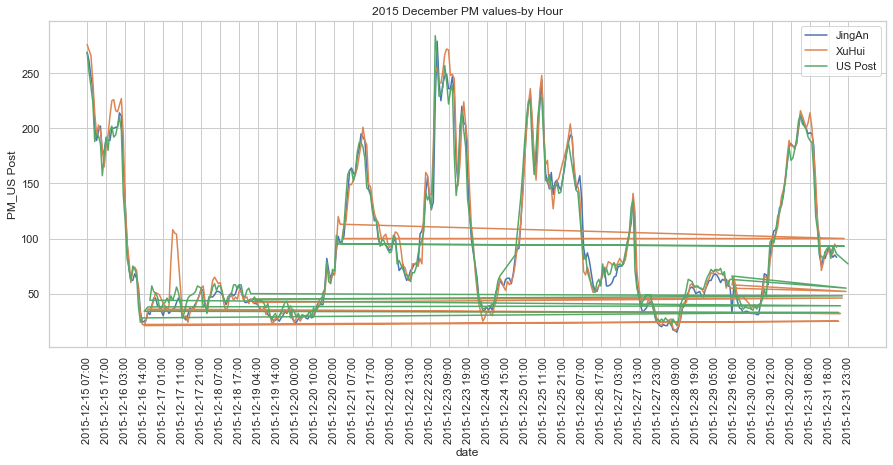

In [334]:
## hourly PM values
sns.set(style='whitegrid')
plt.figure(figsize=(15,6))

ax1=sns.lineplot(x=df.index,y='PM_Jingan',data=df)
ax2=sns.lineplot(x=df.index,y='PM_Xuhui',data=df)
ax3=sns.lineplot(x=df.index,y='PM_US Post',data=df)
ax1.set_title('2015 December PM values-by Hour')
plt.legend(['JingAn','XuHui','US Post'],loc='best')
plt.xticks(range(0,len(df),10),rotation=90)
plt.show()

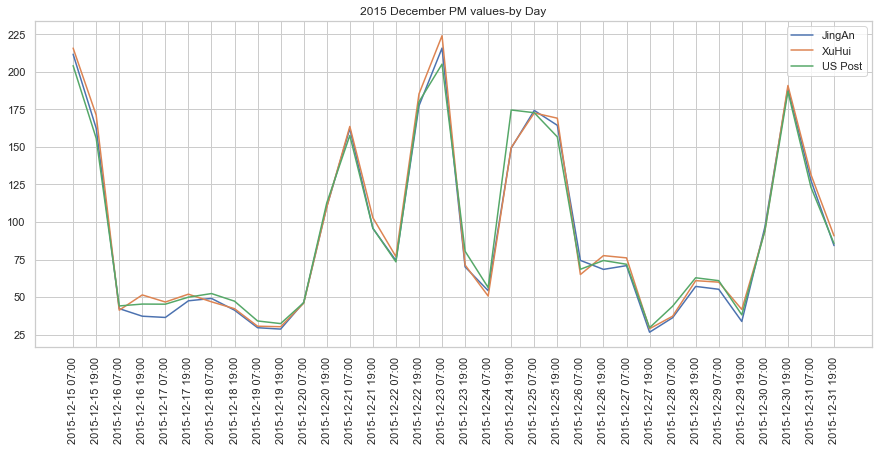

In [335]:
## resampling: plot daily PM values
dt=pd.read_csv('D:/pyLX/PM_Test.csv')
dt['date']=pd.PeriodIndex(year=dt['year'],month=dt['month'],day=dt['day'],hour=dt['hour'],freq='H')
dt.set_index('date',inplace=True)

dt1=dt['PM_Jingan'].resample('12H').mean()
dt2=dt['PM_Xuhui'].resample('12H').mean()
dt3=dt['PM_US Post'].resample('12H').mean()
dt1.index = dt1.index.map(str)
dt2.index = dt2.index.map(str)
dt3.index = dt3.index.map(str)

plt.figure(figsize=(15,6))
plt.plot(dt1.index,dt1.values)
plt.plot(dt2.index,dt2.values)
plt.plot(dt3.index,dt3.values)

plt.title('2015 December PM values-by Day')
plt.legend(['JingAn','XuHui','US Post'],loc='best')
plt.xticks(rotation=90)

plt.show()
